# Load packages

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
print(tf.keras.__version__)


2.7.0


## Import data

We are going to start with the mnist dataset. .

In [17]:

from keras.datasets import mnist
(X_train, Y_train_scalar), (X_test, Y_test_scalar) = mnist.load_data()

n_max = 5000
X_train = X_train[0:n_max,:,:]
X_test = X_test[0:n_max,:,:]
Y_train_scalar = Y_train_scalar[0:n_max]
Y_test_scalar = Y_test_scalar[0:n_max]

mnist_label_list = [ '0', '1','2','3','4','5','6','7','8','9']

print(X_train.shape)
print(X_test.shape)
print(np.unique(Y_train_scalar))

(5000, 28, 28)
(5000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


Now, let's look at some of the data :

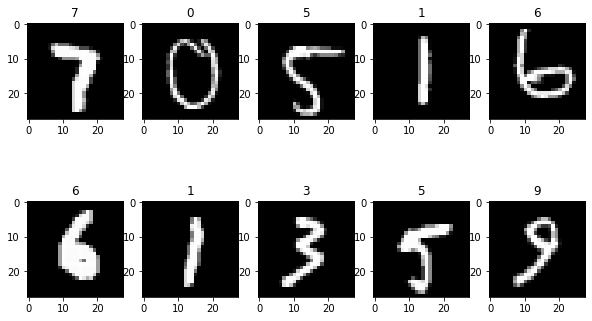

In [18]:
plt.figure(figsize=(10, 6))
for idx in range(0,10):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_train.shape[0])
    plt.imshow(X_test[rand_ind,:,:],cmap='gray')
    plt.title(mnist_label_list[int(Y_test_scalar[rand_ind])])


Now, we carry out some data pre-processing. In particular, we normalise the data to the range $[0,1]$ and convert the labels to a one-hot encoding :

In [19]:
# input image dimensions (mnist data is grey-level)
img_rows, img_cols, nb_channels = X_train.shape[1], X_train.shape[2], 1

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(Y_train_scalar)
Y_test = to_categorical(Y_test_scalar)

# number of classes
nb_classes = Y_train.shape[1]

print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
print('Y_train shape:', Y_train.shape)
print('There are {} train data'.format(X_train.shape[0]))
print('There are {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)


X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
There are 5000 train data
There are 5000 test data
28 28 1


## Defining the model for MNIST

We will now define the simple CNN described below, for use with MNIST. The input of the CNN is a set of (28,28,1) image tensors. We apply :

    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
    - a ReLu activation function
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)
    
    - We then Flatten the data (reduce them to a vector in order to be able to apply a Fully-Connected layer to it)
    - A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)

We define the parameters of the model :

In [20]:
learning_rate = 0.01
n_epochs = 10
batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

# --- Size of the successive layers
n_h_0 = nb_channels  # number of input channels
n_h_1 = nb_filters
n_h_2 = nb_filters

In [21]:


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',strides=(1,1), input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 63,658
Trainable params: 63,658
Non-trainable params: 0
__________________________________________________

In [22]:
# compile, train and evaluate model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, 
          epochs=n_epochs,
          verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
79/79 [==============================] - 2s 17ms/step - loss: 0.5028 - accuracy: 0.8538 - val_loss: 0.2538 - val_accuracy: 0.9264
Epoch 2/10
79/79 [==============================] - 1s 14ms/step - loss: 0.1268 - accuracy: 0.9600 - val_loss: 0.1736 - val_accuracy: 0.9394
Epoch 3/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0740 - accuracy: 0.9762 - val_loss: 0.1592 - val_accuracy: 0.9492
Epoch 4/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0636 - accuracy: 0.9786 - val_loss: 0.1978 - val_accuracy: 0.9446
Epoch 5/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.1969 - val_accuracy: 0.9498
Epoch 6/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.1863 - val_accuracy: 0.9534
Epoch 7/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0124 - accuracy: 0.9952 - val_loss: 0.2471 - val_accuracy: 0.9510
Epoch 8/10
79

### Import data

In [23]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train_scalar), (X_test, Y_test_scalar) = cifar10.load_data()

print("Train data shape : ", X_train.shape)
print("Test data shape : ", X_test.shape)
print("Number of data categories : ", np.unique(Y_train_scalar))

Train data shape :  (50000, 32, 32, 3)
Test data shape :  (10000, 32, 32, 3)
Number of data categories :  [0 1 2 3 4 5 6 7 8 9]


The CIFAR-10 dataset has 10 classes. These are the following :

In [24]:
cifar_10_list = [ 'airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### Display some of the images

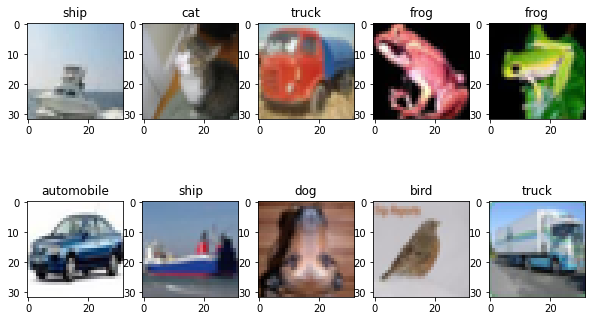

In [25]:
plt.figure(figsize=(10, 6))
for idx,i in enumerate(range(100,110)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(X_train[i, :, :, :])
    plt.title(cifar_10_list[int(Y_train_scalar[i])])

## Format conversion

In [26]:
# input image dimensions
img_rows, img_cols, nb_channels = 32, 32, 3
nb_classes = 10

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert to one-hot encoding
Y_train = to_categorical(Y_train_scalar)
Y_test = to_categorical(Y_test_scalar)

print('X_train shape:', X_train.shape)
print('Y_train_scalar shape:', Y_train_scalar.shape)
print('Y_train shape (one hot encoding):', Y_train.shape)
print('There is {} train data'.format(X_train.shape[0]))
print('There is {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)

X_train shape: (50000, 32, 32, 3)
Y_train_scalar shape: (50000, 1)
Y_train shape (one hot encoding): (50000, 10)
There is 50000 train data
There is 10000 test data
32 32 3


For computational reasons, we are going to reduce the amount of training data :

In [27]:
n_train_samples = 10000
X_train = X_train[0:n_train_samples,:,:,:]
Y_train = Y_train[0:n_train_samples,:]
print(X_train.shape)
print(Y_train.shape)

(10000, 32, 32, 3)
(10000, 10)




We are now going to create the model described just above, and train it on the previously loaded CIFAR dataset.

## We define the parameters of the model, and of the training

In [28]:

learning_rate = 0.01
n_epochs = 10
batch_size = 64
# number of convolutional filters to use
nb_filters = 32 

# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)


# --- Size of the successice layers
n_h_0 = nb_channels
n_h_1 = nb_filters
n_h_2 = nb_filters
n_h_3 = nb_filters

input_shape = (img_rows, img_cols, nb_channels)


Now, define the model :

In [29]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',strides=(1,1), input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',strides=(1,1), input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2),strides=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',strides=(1,1), input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)             

Again, compile, display and train the model

In [30]:

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, 
          epochs=n_epochs,
          verbose=1, 
          validation_data=(X_test, Y_test))


Epoch 1/10
157/157 [==============================] - 4s 23ms/step - loss: 2.3176 - accuracy: 0.0960 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 2.3033 - accuracy: 0.0990 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 2.3033 - accuracy: 0.0951 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 2.3033 - accuracy: 0.0986 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 5/10
157/157 [==============================] - 3s 16ms/step - loss: 2.3034 - accuracy: 0.0987 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
157/157 [==============================] - 3s 19ms/step - loss: 2.3037 - accuracy: 0.1000 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 7/10
157/157 [==============================] - 3s 16ms/step - loss: 2.3036 - accuracy: 0.1009 - val_loss: 2.3036 - val_accuracy: 0.1000

Evaluate the performances of the model on the test data




In [31]:
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3034327030181885
Test accuracy: 0.10000000149011612


### Inspecting the network's results

Let's take a look at what the network has learned. What do you think ?

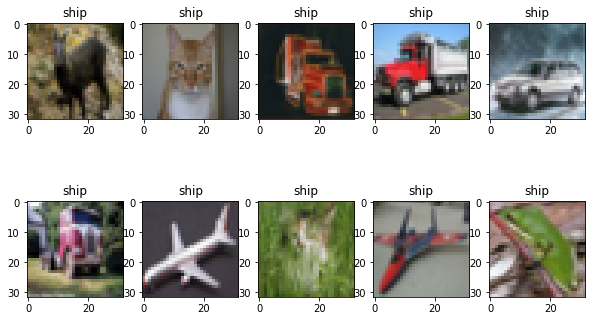

In [32]:
plt.figure(figsize=(10, 6))
for idx,i in enumerate(range(100,110)):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_test.shape[0])
    predicted_class = np.argmax(np.squeeze(model.predict(np.expand_dims(X_test[rand_ind,:,:,:],axis=0)))) 
    plt.imshow(X_test[rand_ind,:,:,:])
    plt.title(cifar_10_list[int(predicted_class)])

###Exploring the model

32
(3, 3)
(3, 3, 3, 32)


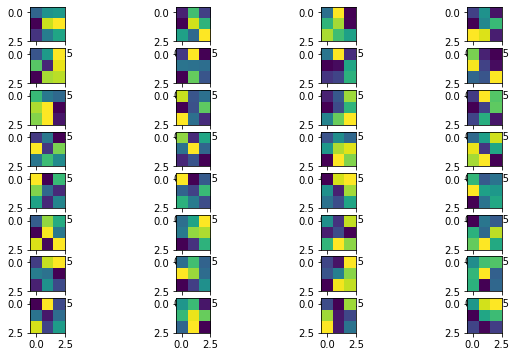

In [33]:
print(model.layers[0].filters)
print(model.layers[0].kernel_size)
print(model.layers[0].get_weights()[0].shape)
plt.figure(figsize=(10, 6))
for num in range(0,32):
    plt.subplot(8, 4, num+1)
    plt.imshow(model.layers[0].get_weights()[0][:,:,0,num]) 